
    - Noise pollution from 5 sensors in San Salvario (there is 1 CSV with noise levels and one with metadata of the sensors): https://torino.monica-project.eu/noise/
    - Number of people in the area: https://torino.monica-project.eu/crowd/
    - POI / Trade / Businesses: https://torino.monica-project.eu/trade-and-business/
    - Police complains: http://aperto.comune.torino.it/dataset/riepilogo-segnalazioni-contact-center-polizia-municipale-2019
     - These are in Italian, so you might need some help from google translate. We will try to get a translator on Fiverr to translate it into English
    - Text data from Twitter and Facebook (is it possible to scrap from facebook?). Some ideas of hashtags: #sansa, #sansalvario, #movida, #movidatorino, #torino
    - 
    We can also have access to Weather and Air Pollution data. That's through the OpenWeather API, I can get you a key for that. We have access only for the last year but the participants have from 2018. 

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fuse the csvs

In [4]:
from parse_noise import read_noise_csv, combine_date_hour
# Load the noise csvs


from pathlib import Path

noise_path = Path("data/noise")

noise_dfs = []

for file in noise_path.iterdir():
    print(file)
    noise_dfs.append(
        read_noise_csv(file)
    )
    
# Process the CSVs
for df in noise_dfs:
    df["combined_datetime"] = df.apply(combine_date_hour, axis=1)

data/noise/2018.csv
data/noise/2016.csv
data/noise/2017.csv
data/noise/2019.csv


In [5]:
noise_df = pd.concat(noise_dfs)
noise_df = noise_df.sort_values("combined_datetime")

In [6]:
noise_df.head()

,Data,Ora,C1,C2,C3,C4,C5,combined_datetime
0,01-06-2016,00:00,"61,1","58,8","63,7","60,4","60,2",2016-06-01 00:00:00
1,01-06-2016,01:00,"57,2","56,1","60,4","57,7","58,4",2016-06-01 01:00:00
2,01-06-2016,02:00,"52,5","53,4","52,9","56,7","56,5",2016-06-01 02:00:00
3,01-06-2016,03:00,"50,6","46,6","45,7","47,9","55,6",2016-06-01 03:00:00
4,01-06-2016,04:00,"47,4","46,2","45,1","45,8","56,8",2016-06-01 04:00:00


In [7]:
from parse_noise import convert_float

y_cols = ['C1', 'C2', 'C3', 'C4', 'C5']

for y_col in y_cols:
    noise_df[y_col] = noise_df[y_col].map(convert_float)

In [8]:
# Making sure all datetimes are present
noise_df["combined_datetime"].isna().value_counts()

False    31416
Name: combined_datetime, dtype: int64

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

array([<AxesSubplot:xlabel='combined_datetime'>,
       <AxesSubplot:xlabel='combined_datetime'>,
       <AxesSubplot:xlabel='combined_datetime'>,
       <AxesSubplot:xlabel='combined_datetime'>,
       <AxesSubplot:xlabel='combined_datetime'>], dtype=object)

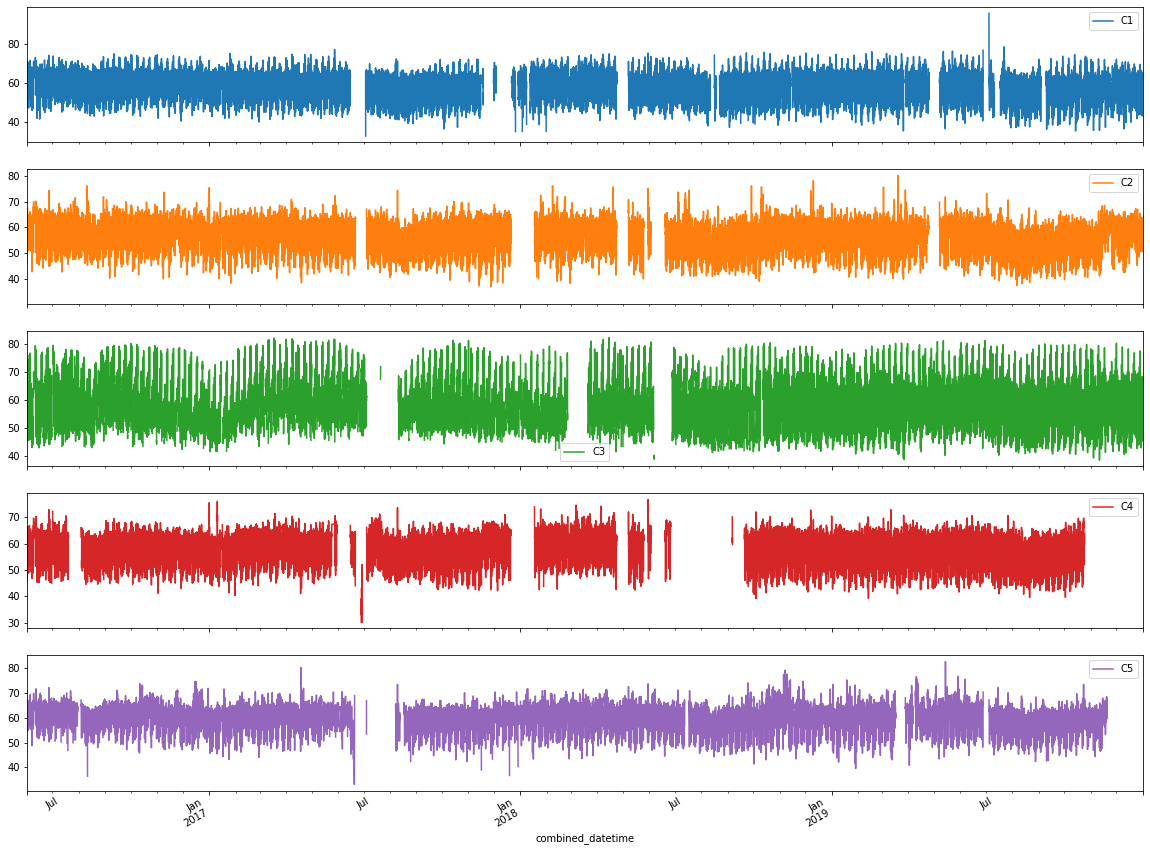

In [73]:
import seaborn as sns

# fig, ax = pyplot.subplots(figsize=(20,16))

# sns.lineplot(
#     x="combined_datetime", y=y_cols, ax=ax, data=noise_df
# )
noise_df.plot(x="combined_datetime", y=y_cols, figsize=(20,16), subplots=True)

In [76]:
noise_df["year"] = noise_df.combined_datetime.map(lambda s: s.year)
noise_df["month"] = noise_df.combined_datetime.map(lambda s: s.month)
noise_df["day_name"] = noise_df.combined_datetime.map(lambda s: s.day_name())

In [84]:
agg_noise = noise_df.groupby(["year","month", "day_name"])[y_cols].agg("count")

## Wifi Data

In [11]:
wifi_data = pd.read_csv("data/crowd_wifi/Rock_crowd.csv")
wifi_data.head()

,Time,No. of Visitors
0,2018-10-24 17:00,47
1,2018-10-24 18:00,155
2,2018-10-24 19:00,181
3,2018-10-24 20:00,211
4,2018-10-24 21:00,239


In [12]:
wifi_data.columns

Index(['Time', 'No. of Visitors'], dtype='object')

<AxesSubplot:xlabel='Time'>

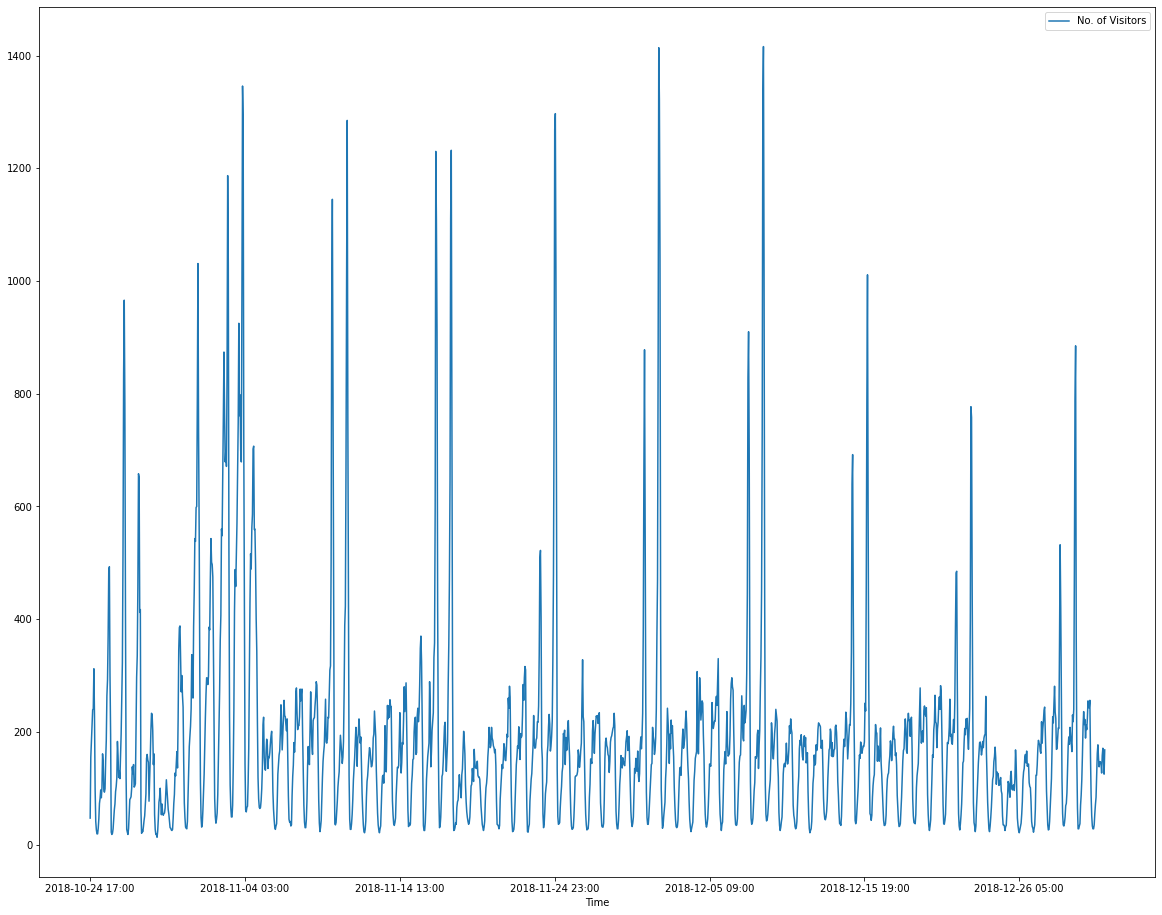

In [13]:
wifi_data.plot(x="Time", y="No. of Visitors", figsize=(20,16))

In [146]:
wifi_data["time"] = wifi_data.Time.map(
    lambda s: datetime.strptime(s, "%Y-%m-%d %H:%M")
)

In [147]:
wifi_data["day_name"] = wifi_data.time.map(lambda s : s.day_name())

In [148]:
wifi_data.head()

,Time,No. of Visitors,time,day_name
0,2018-10-24 17:00,47,2018-10-24 17:00:00,Wednesday
1,2018-10-24 18:00,155,2018-10-24 18:00:00,Wednesday
2,2018-10-24 19:00,181,2018-10-24 19:00:00,Wednesday
3,2018-10-24 20:00,211,2018-10-24 20:00:00,Wednesday
4,2018-10-24 21:00,239,2018-10-24 21:00:00,Wednesday


<AxesSubplot:xlabel='day_name'>

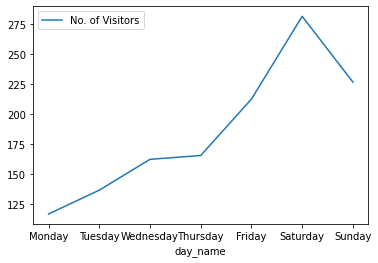

In [151]:
wifi_weekday_agg = wifi_data[["day_name", "No. of Visitors"]].groupby("day_name").agg("mean")

wifi_weekday_agg = wifi_weekday_agg.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

wifi_weekday_agg.plot()

## Sim Data

In [36]:
sim_path = Path("data/crowd_sim")

sim_dfs = []

for file in sim_path.iterdir():
    sim_dfs.append(
        pd.read_csv(file, delimiter=";")
    )
    
sim_df = pd.concat(sim_dfs)

In [37]:
sim_df.head()

,cluster,data_da,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi)
0,Presenze,2017-10-15T21:00:00Z,2017-10-15T22:00:00Z,2848,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
1,Presenze,2017-10-15T20:00:00Z,2017-10-15T21:00:00Z,2846,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
2,Presenze,2017-10-15T19:00:00Z,2017-10-15T20:00:00Z,2822,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
3,Presenze,2017-10-15T18:00:00Z,2017-10-15T19:00:00Z,2717,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
4,Presenze,2017-10-15T17:00:00Z,2017-10-15T18:00:00Z,2535,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600


In [41]:
sim_df.shape

(15098, 7)

In [18]:
from datetime import datetime

In [42]:
sim_df["end_time"] = sim_df.data_a.map(lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ"))

<AxesSubplot:xlabel='end_time', ylabel='numero_presenze'>

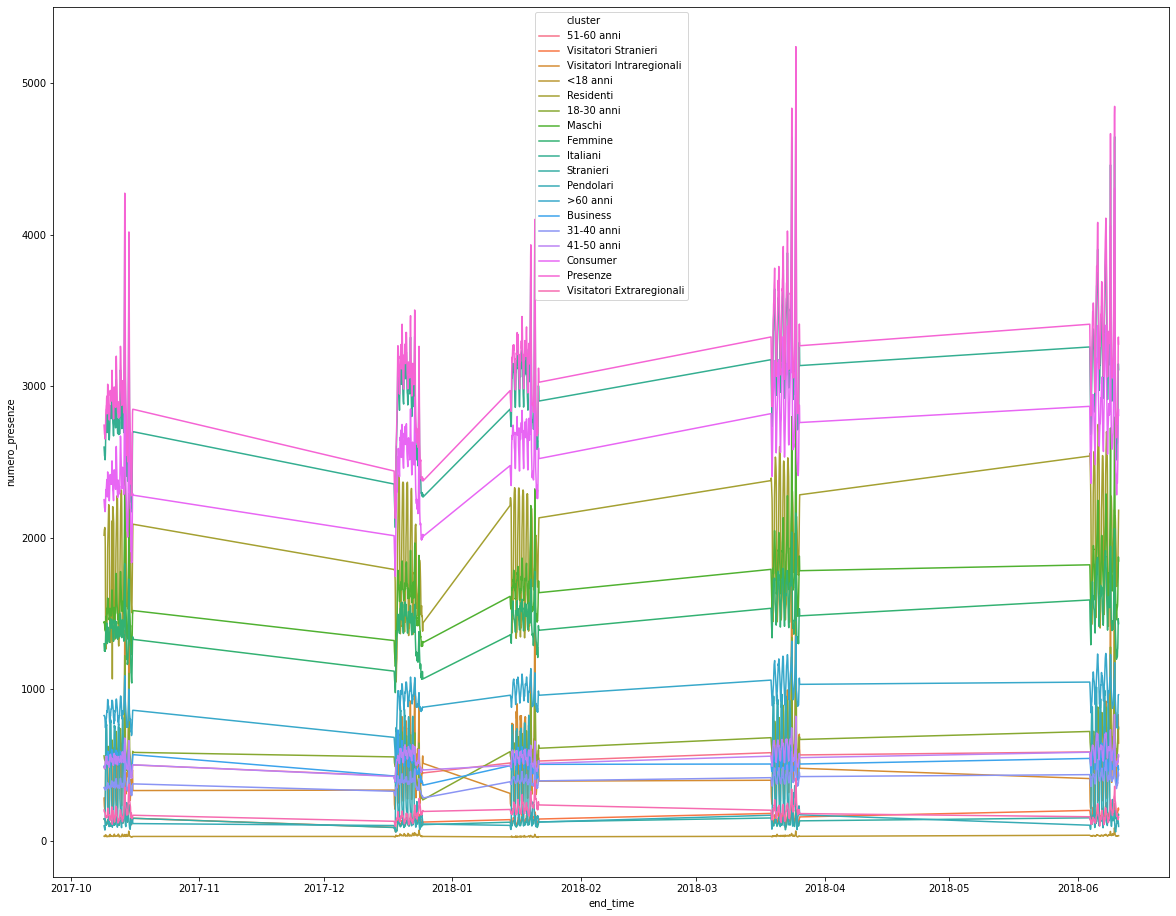

In [58]:
sim_df = sim_df.sort_values("end_time")
import seaborn as sns

from matplotlib import pyplot

fig, ax  = pyplot.subplots(figsize=(20,16))
sns.lineplot(
    x="end_time", y="numero_presenze", hue="cluster", data=sim_df
)

<AxesSubplot:xlabel='end_time'>

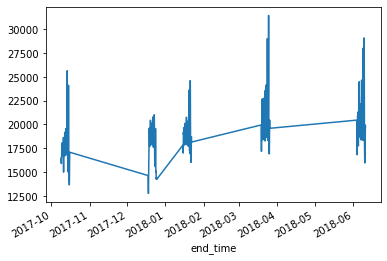

In [44]:
a = sim_df.groupby("end_time")["numero_presenze"].agg("sum")

a.plot(kind="line")

In [104]:
t = sim_df.end_time.iloc[300]

In [105]:
t.day

9

In [106]:
sim_df["year"] = sim_df.end_time.map(lambda s: s.year)
sim_df["month"] = sim_df.end_time.map(lambda s: s.month)
sim_df["day_name"] = sim_df.end_time.map(lambda s: s.day_name())
sim_df["day"] = sim_df.end_time.map(lambda s: s.day)

<AxesSubplot:xlabel='end_time', ylabel='numero_presenze'>

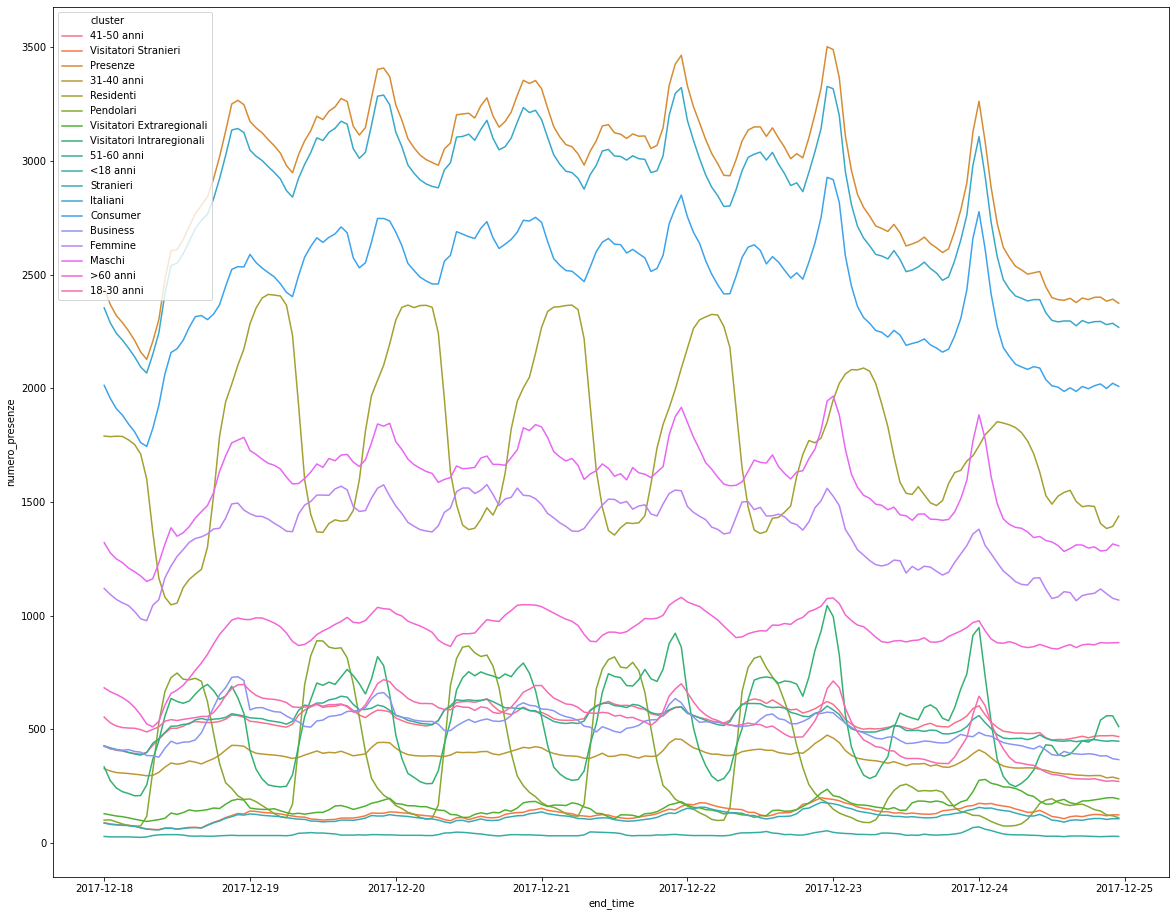

In [74]:
sub = sim_df[sim_df.end_time.map(lambda s: s.year==2017 and s.month==12)]

fig, ax = pyplot.subplots(figsize=(20,16))

sns.lineplot(x="end_time", y="numero_presenze", hue="cluster", data=sub)

<AxesSubplot:xlabel='end_time', ylabel='numero_presenze'>

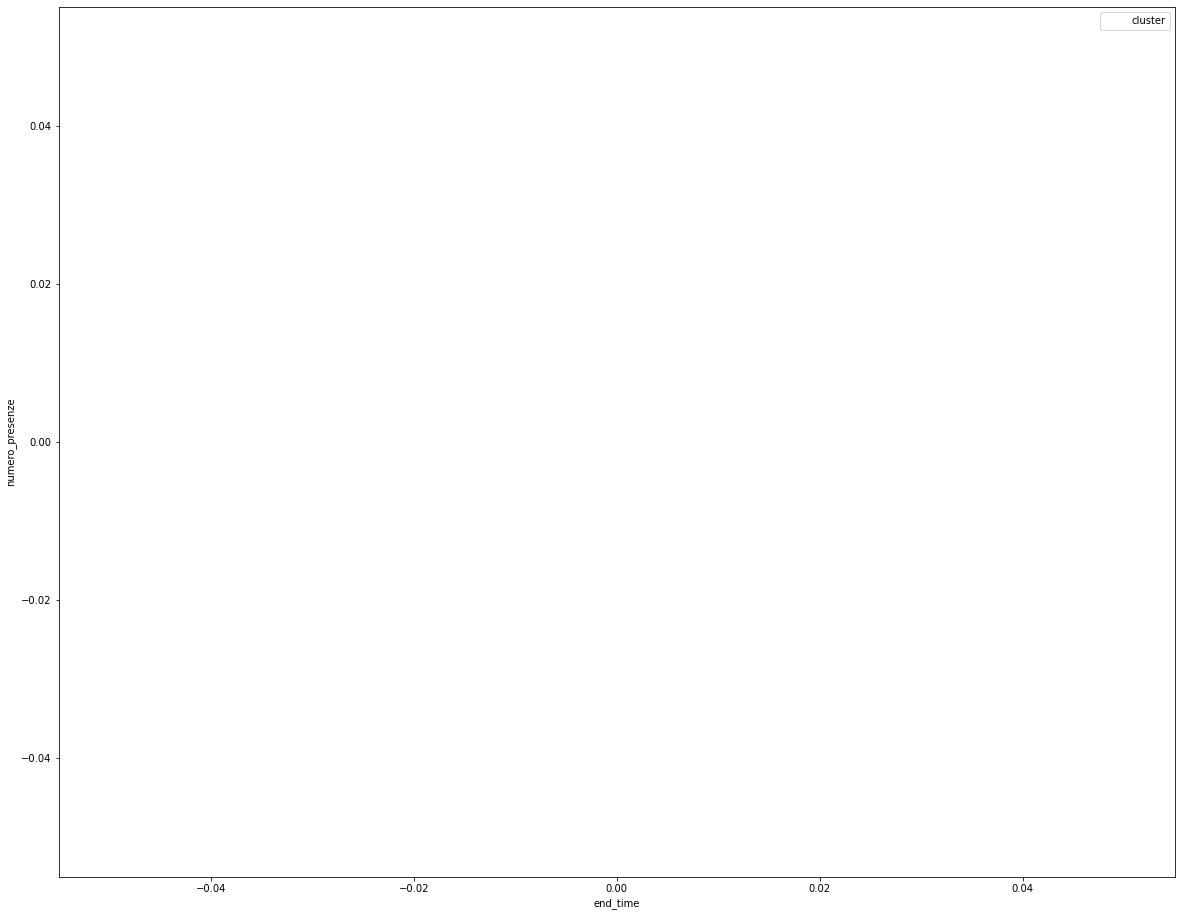

In [66]:
fig, ax = plt.subplots(figsize=(20,16))

sns.lineplot(
    x="end_time", y="numero_presenze", hue="cluster", data=sim_df[(sim_df.year == 2017) & (sim_df.month == 11)]
)

<AxesSubplot:xlabel='month'>

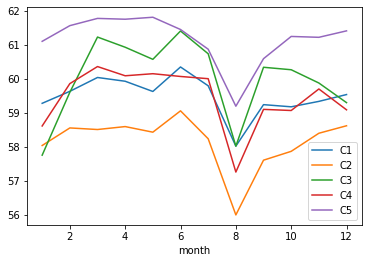

In [86]:
## Average noise for every day of the month
## Average visitors for every day of the month


noise_df.groupby("month")[y_cols].agg("mean").plot()

In [ ]:
noise_df.groupby("day_name")

In [95]:
sim_df.head()

,cluster,data_da,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),end_time,year,month,day_name
2015,51-60 anni,2017-10-08T22:00:00Z,2017-10-08T23:00:00Z,487,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600,2017-10-08 23:00:00,2017,10,Sunday
3019,Visitatori Stranieri,2017-10-08T22:00:00Z,2017-10-08T23:00:00Z,144,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600,2017-10-08 23:00:00,2017,10,Sunday
2350,Visitatori Intraregionali,2017-10-08T22:00:00Z,2017-10-08T23:00:00Z,281,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600,2017-10-08 23:00:00,2017,10,Sunday
1343,<18 anni,2017-10-08T22:00:00Z,2017-10-08T23:00:00Z,30,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600,2017-10-08 23:00:00,2017,10,Sunday
2851,Residenti,2017-10-08T22:00:00Z,2017-10-08T23:00:00Z,2016,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600,2017-10-08 23:00:00,2017,10,Sunday


In [134]:
sim_df.month.unique()

array([10, 12,  1,  3,  6])

In [135]:
sim_df.day.unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 16, 17,
       25,  3,  4,  5,  6,  7])

In [136]:
sim_df_summed = sim_df.groupby(["year", "month", "day_name"], as_index=False).agg("mean")
sim_df_summed.month.unique()

array([10, 12,  1,  3,  6])

<AxesSubplot:xlabel='day_name', ylabel='numero_presenze'>

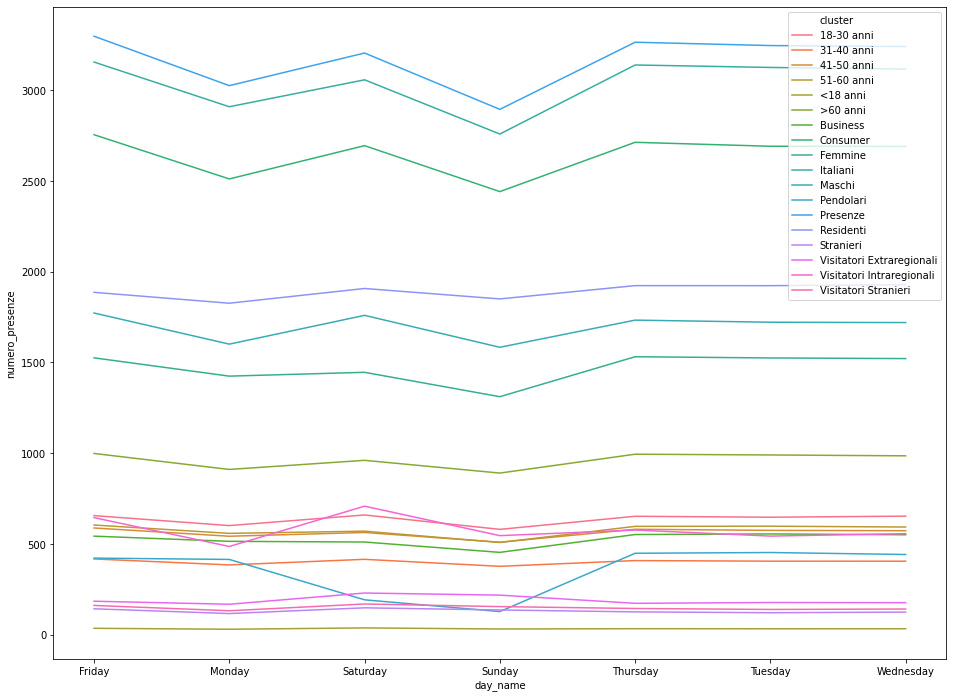

In [179]:
sim_cluster_presence_weekday = sim_df[["day_name", "numero_presenze", "cluster"]].groupby(["cluster","day_name"], as_index=False).agg("mean")

fig, ax = plt.subplots(
    figsize=(16,12)
)

sns.lineplot(
    y="numero_presenze", x="day_name", hue="cluster", ax=ax, data=sim_cluster_presence_weekday
)

<AxesSubplot:xlabel='day_name', ylabel='numero_presenze'>

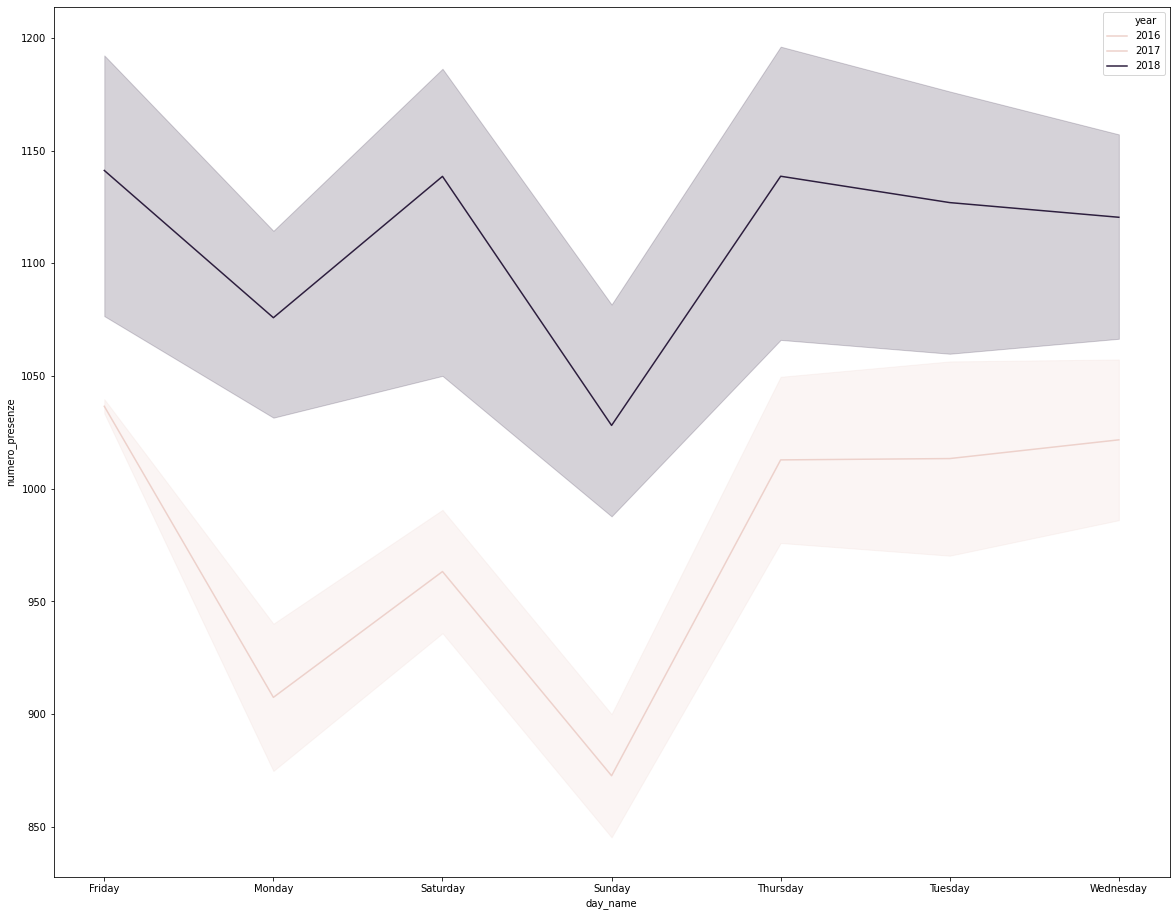

In [137]:

ax,fig = plt.subplots(figsize=(20,16))
sns.lineplot(x="day_name",  y="numero_presenze",hue="year", data=sim_df_summed)

In [100]:
sim_df.groupby("month").agg("sum")

,numero_presenze,dettaglio(secondi),year
month,,,
1,3170146,10886400,6102432
3,3449514,10821600,6066108
6,3430208,10886400,6102432
10,2932172,10872000,6091340
12,2963225,10886400,6099408


<AxesSubplot:xlabel='month'>

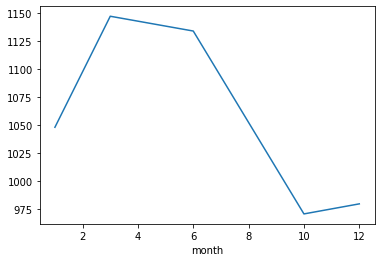

In [87]:
sim_df.groupby("month")["numero_presenze"].agg("mean").plot()

<AxesSubplot:xlabel='day_name'>

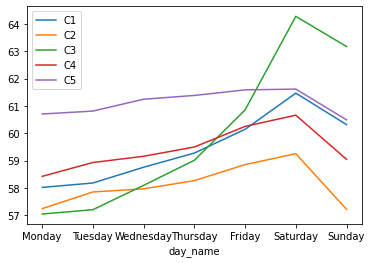

In [94]:
noise_day_agg = noise_df.groupby("day_name")[y_cols].agg("mean")

ax = noise_day_agg.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).plot()

ax.set_title("")

In [156]:
noise_day_agg

,C1,C2,C3,C4,C5
day_name,,,,,
Friday,60.142263,58.849940,60.852785,60.249169,61.587626
Monday,58.013952,57.237264,57.039645,58.419377,60.704369
Saturday,61.467762,59.248497,64.281982,60.660932,61.616817
Sunday,60.314744,57.211580,63.175773,59.043918,60.489650
Thursday,59.272454,58.262666,59.008289,59.495018,61.383329
Tuesday,58.175709,57.847080,57.197644,58.926253,60.810624
Wednesday,58.753532,57.961441,58.089839,59.154505,61.244912


In [155]:
wifi_weekday_agg

,No. of Visitors
day_name,
Monday,116.983333
Tuesday,136.847222
Wednesday,162.515695
Thursday,165.708333
Friday,212.695833
Saturday,281.595833
Sunday,226.841667


In [161]:
noise_wifi_visitors = noise_day_agg.merge(wifi_weekday_agg, on="day_name").reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
noise_wifi_visitors

,C1,C2,C3,C4,C5,No. of Visitors
day_name,,,,,,
Monday,58.013952,57.237264,57.039645,58.419377,60.704369,116.983333
Tuesday,58.175709,57.847080,57.197644,58.926253,60.810624,136.847222
Wednesday,58.753532,57.961441,58.089839,59.154505,61.244912,162.515695
Thursday,59.272454,58.262666,59.008289,59.495018,61.383329,165.708333
Friday,60.142263,58.849940,60.852785,60.249169,61.587626,212.695833
Saturday,61.467762,59.248497,64.281982,60.660932,61.616817,281.595833
Sunday,60.314744,57.211580,63.175773,59.043918,60.489650,226.841667


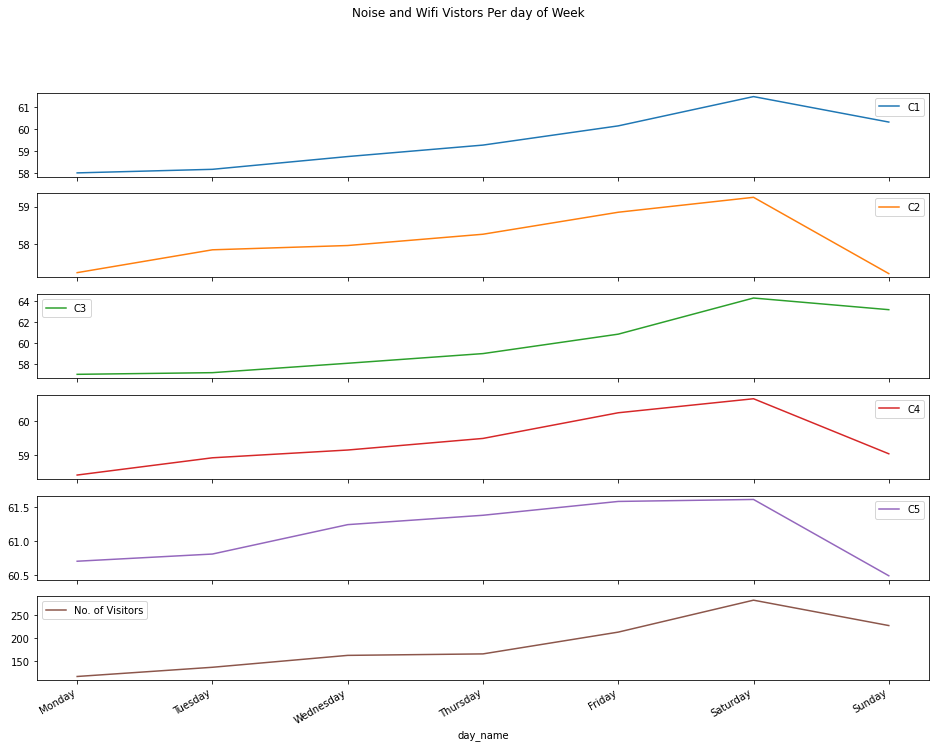

In [167]:
ax = noise_wifi_visitors.plot(subplots=True, figsize=(16,12), title="Noise and Wifi Vistors Per day of Week")

In [165]:
ax

array([<AxesSubplot:xlabel='day_name'>, <AxesSubplot:xlabel='day_name'>,
       <AxesSubplot:xlabel='day_name'>, <AxesSubplot:xlabel='day_name'>,
       <AxesSubplot:xlabel='day_name'>, <AxesSubplot:xlabel='day_name'>],
      dtype=object)

### TODO:
   -  Check noise and crowd based on time

## Police Complaints

In [140]:
complaints_df = pd.read_csv("data/police_complaints/OpenDataContact_Gennaio_Giugno_2019.csv")
complaints_df.head()

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,5.0,PIANEZZA/(STRADA) ...,NaN,16/01/2019,13.27
1,Allarme Sociale,Altro,1.0,CERNAIA/(VIA) ...,NaN,30/01/2019,NaN
2,Allarme Sociale,Altro,5.0,REISS ROMOLI/GUGLIELMO (VIA) ...,NaN,07/02/2019,NaN
3,Allarme Sociale,Altro,7.0,FIRENZE/(LUNGO DORA) ...,NaN,13/02/2019,9.54
4,Allarme Sociale,Altro,7.0,MEISINO/(STRADA DEL) ...,Area Verde,20/02/2019,11.21


In [142]:
complaints_df.Localita.value_counts()

NIZZA/(VIA)                                                               14
REGINA MARGHERITA/(CORSO)                                                 13
CASALE/(CORSO)                                                             9
VERCELLI/(CORSO)                                                           9
SVIZZERA/(CORSO)                                                           9
                                                                          ..
BIANCHI/NICOMEDE (VIA)                                                     1
ARSENALE/(VIA)                                                             1
CREMONA/(VIA)                                                              1
SANTAROSA/SANTORRE (VIA)                                                   1
BARDASSANO/(VIA)                                                           1
Name: Localita, Length: 633, dtype: int64

In [144]:
complaints_df[complaints_df.Localita.map(lambda s: "torino" in str(s).lower())]

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
11,Convivenza Civile,Aggregazioni giovanili,6.0,RESPIGHI/OTTORINO (PIAZZA) ...,NaN,13/06/2019,10.22
17,Convivenza Civile,Altro,6.0,RESPIGHI/OTTORINO (PIAZZA) ...,NaN,07/01/2019,NaN
580,Qualità Urbana,Altro,6.0,RESPIGHI/OTTORINO (PIAZZA) ...,NaN,17/02/2019,23.11
645,Qualità Urbana,Altro,6.0,RESPIGHI/OTTORINO (PIAZZA) ...,NaN,25/03/2019,14.28


In [181]:
noise_df["hour"] = noise_df.combined_datetime.map(lambda s : s.hour)
noise_df.head()

,Data,Ora,C1,C2,C3,C4,C5,combined_datetime,year,month,day_name,hour
0,01-06-2016,00:00,61.1,58.8,63.7,60.4,60.2,2016-06-01 00:00:00,2016,6,Wednesday,0
1,01-06-2016,01:00,57.2,56.1,60.4,57.7,58.4,2016-06-01 01:00:00,2016,6,Wednesday,1
2,01-06-2016,02:00,52.5,53.4,52.9,56.7,56.5,2016-06-01 02:00:00,2016,6,Wednesday,2
3,01-06-2016,03:00,50.6,46.6,45.7,47.9,55.6,2016-06-01 03:00:00,2016,6,Wednesday,3
4,01-06-2016,04:00,47.4,46.2,45.1,45.8,56.8,2016-06-01 04:00:00,2016,6,Wednesday,4


<AxesSubplot:xlabel='hour', ylabel='C1'>

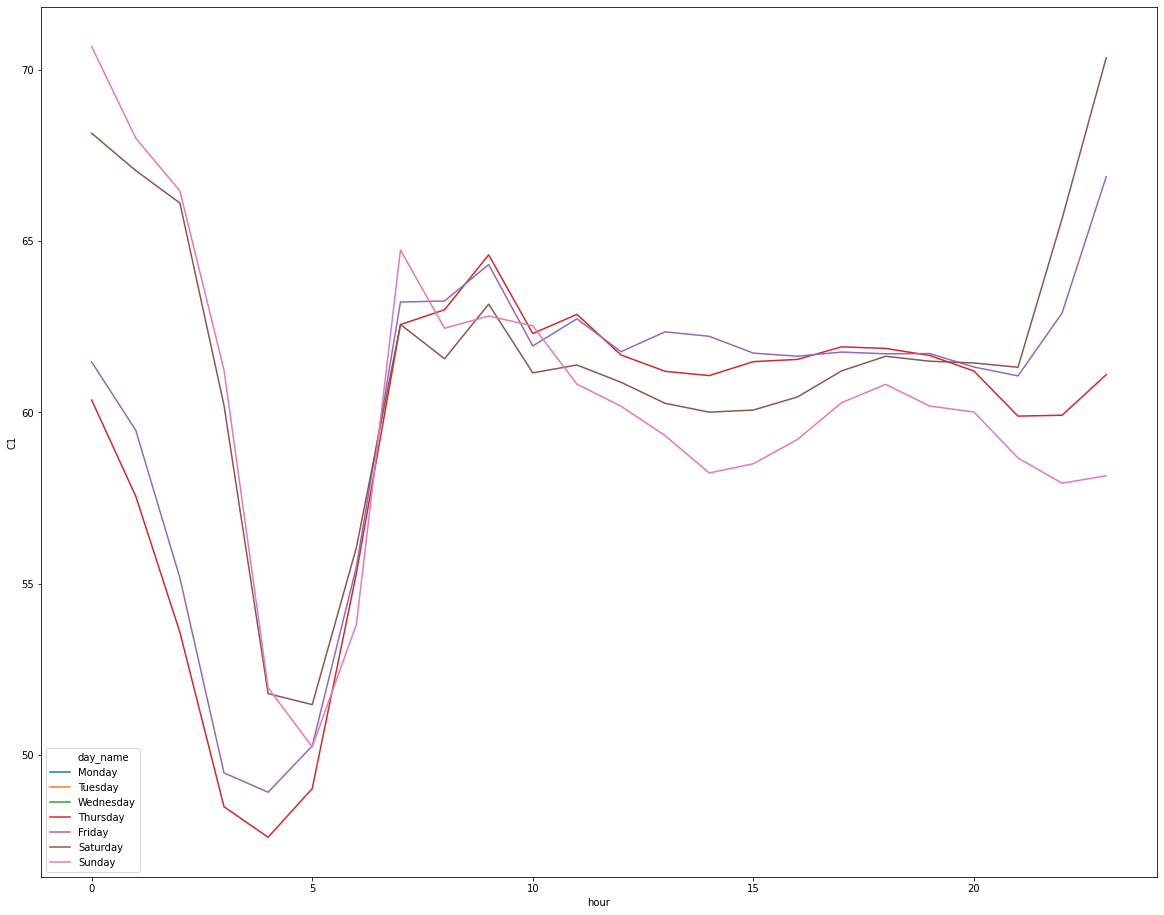

In [223]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


noise_weekday_hour = noise_df.groupby(["day_name", "hour"], as_index=False)[y_cols].agg("mean")
noise_weekday_hour["day_name"] = pd.Categorical(noise_weekday_hour["day_name"], categories=cats, ordered=True)

noise_weekday_hour = noise_weekday_hour.sort_values(["day_name", "hour"])


fig, ax = plt.subplots(figsize=(20,16))


noise_weekday_hour_sub = noise_weekday_hour[
    noise_weekday_hour.day_name.isin(["Thursday", "Friday", "Saturday", "Sunday"])
]
sns.lineplot(
    x="hour", y="C1", hue="day_name", data=noise_weekday_hour_sub[["C1", "day_name", "hour"]]
)

In [222]:
noise_weekday_hour_sub

,day_name,hour,C1,C2,C3,C4,C5
96,Thursday,0,60.363030,58.074138,64.435260,59.784354,59.361392
97,Thursday,1,57.552121,55.171676,61.262209,56.660274,56.370064
98,Thursday,2,53.583030,52.123699,57.106977,54.063699,53.492994
99,Thursday,3,48.491515,48.406395,50.537791,49.663014,51.294268
100,Thursday,4,47.598795,47.146199,48.681977,48.120805,53.351786
...,...,...,...,...,...,...,...
91,Sunday,19,60.186145,59.518713,60.598437,60.706250,62.806494
92,Sunday,20,60.014458,59.116959,59.595312,61.177083,62.116340
93,Sunday,21,58.670482,57.615205,59.682941,60.254861,60.539735
94,Sunday,22,57.933133,57.428070,60.951765,59.475000,60.108609


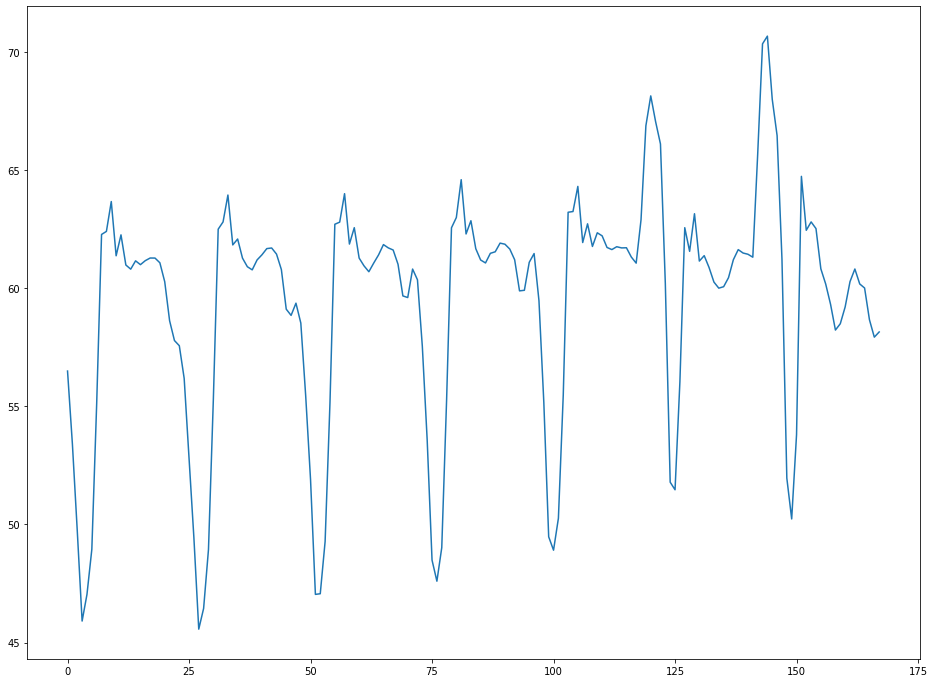

In [218]:
x_ticks = noise_weekday_hour[["day_name", "hour"]]

x_tick_labels = []

for index, row in x_ticks.iterrows():
    label = f"{row.day_name} , {row.hour}:00"
    x_tick_labels.append(label)
ax = noise_weekday_hour["C1"].plot(use_index=False, figsize=(16,12))



In [212]:
noise_weekday_hour

,day_name,hour,C1,C2,C3,C4,C5,day_hour
24,Monday,0,56.497605,56.236842,59.530994,57.632639,57.898026,Monday 0:00
25,Monday,1,53.411377,52.922807,55.672093,54.388889,55.215789,Monday 1:00
26,Monday,2,49.744311,50.265497,51.072674,51.921528,52.503947,Monday 2:00
27,Monday,3,45.911310,46.757558,47.612139,47.846897,50.108497,Monday 3:00
28,Monday,4,47.040237,46.225294,48.449425,47.951351,51.810843,Monday 4:00
...,...,...,...,...,...,...,...,...
91,Sunday,19,60.186145,59.518713,60.598437,60.706250,62.806494,Sunday 19:00
92,Sunday,20,60.014458,59.116959,59.595312,61.177083,62.116340,Sunday 20:00
93,Sunday,21,58.670482,57.615205,59.682941,60.254861,60.539735,Sunday 21:00
94,Sunday,22,57.933133,57.428070,60.951765,59.475000,60.108609,Sunday 22:00
